- DataSet : 
    - `hubble.csv` file
- Instructions : 
    - My task is to load the content of this file, look at the data it contains, and perform a linear regression between the two variables : distance and velocity.
    - To do this regression, I must use the `scikit-learn` library. 
- Deliverables :
    - Visualize results with a quality graph 
    - The graph must include both data points and the curve obtained through linear regression.


In [87]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn

In [88]:
data = pd.read_csv('hubble_data.csv')

# Using Numpy

In [89]:
print("Number of dimensions: ", data.ndim)
print("Shape: ", data.shape)
print("Size: ", data.size)

('Number of dimensions: ', 2)
('Shape: ', (24, 2))
('Size: ', 48)


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
distance              24 non-null float64
recession_velocity    24 non-null int64
dtypes: float64(1), int64(1)
memory usage: 456.0 bytes


In [91]:
data.head()

,distance,recession_velocity
0,0.032,170
1,0.034,290
2,0.214,-130
3,0.263,-70
4,0.275,-185


In [92]:
pd.isnull(data).any #check for null values

<bound method DataFrame.any of     distance  recession_velocity
0      False               False
1      False               False
2      False               False
3      False               False
4      False               False
5      False               False
6      False               False
7      False               False
8      False               False
9      False               False
10     False               False
11     False               False
12     False               False
13     False               False
14     False               False
15     False               False
16     False               False
17     False               False
18     False               False
19     False               False
20     False               False
21     False               False
22     False               False
23     False               False>

# Using Matplotlib

Text(0,0.5,u'recession_velocity')

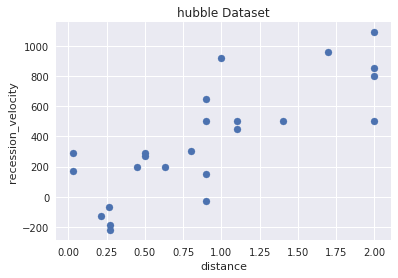

In [117]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the distance against the recession_velocity
ax.scatter(data['distance'], data['recession_velocity'])

# set a title and labels
ax.set_title('hubble Dataset')
ax.set_xlabel('distance')
ax.set_ylabel('di')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe51c501410>,
      dtype=object)

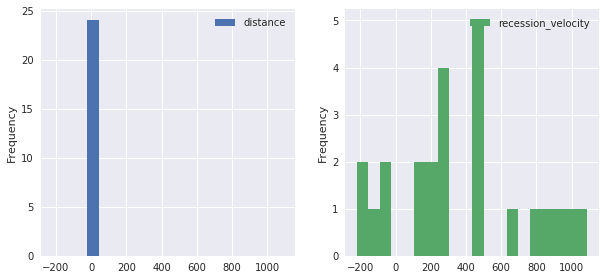

In [128]:
data.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)

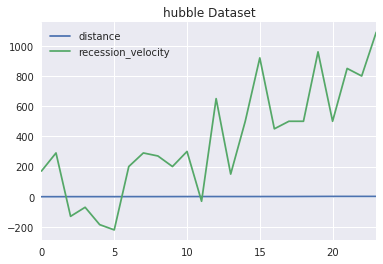

In [133]:
data.plot.line(title = 'hubble Dataset')

# Using Seaborn

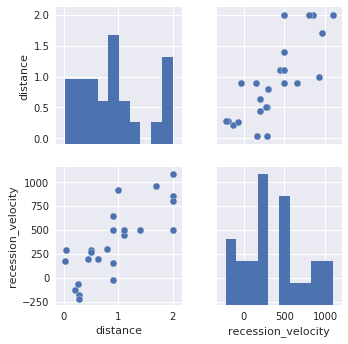

In [93]:
sns.pairplot(data)

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables : distance & recession_velocity

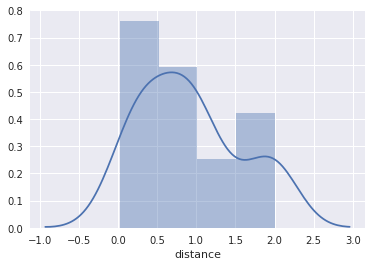

In [94]:
sns.distplot(data['distance'])

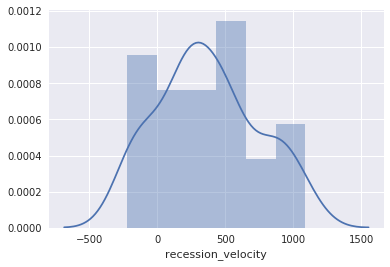

In [95]:
sns.distplot(data['recession_velocity'])

A great way to get started exploring a single variable is with the histogram. A histogram divides the variable into bins, counts the data points in each bin, and shows the bins on the x-axis and the counts on the y-axis.

# Correlation

In [96]:
data.corr()

,distance,recession_velocity
distance,1.000000,0.789639
recession_velocity,0.789639,1.000000


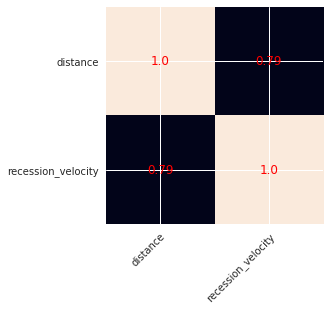

In [139]:
corr = data.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
ha="center", va="center", color="red")

# Training a Linear Regression Model

Let’s now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the recession_velocity column.

In [97]:
x = data[['distance','recession_velocity']]
y = data['recession_velocity']

Our goal is to create a model that generalises well to new data. Our test set serves as a proxy for new data.Trained data is the data on which we apply the linear regression algorithm. And finally we test that algorithm on the test data.The code for splitting is as follows:

In [98]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [99]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let’s grab predictions off the test set and see how well it did!

In [100]:
predictions = lm.predict(x_test)

predictions = lm.predict(X_test)

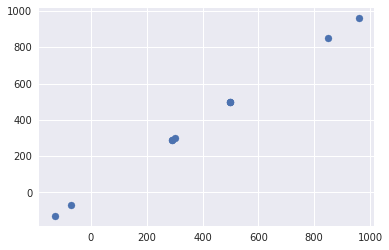

In [101]:
plt.scatter(y_test,predictions)

A pretty good job has been done, a linear model has been obtained!